<a href="https://colab.research.google.com/github/PriyaShah-79/DeepMIL/blob/master/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-328919929.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

 Starting Stock Price Prediction for MSFT...
Data successfully downloaded. Total rows: 1006
Data split: Train size = 804, Test size = 202
Model training complete.

 Model Evaluation on Test Set:
Mean Squared Error (MSE): $3.70
R-squared (R2 Score): 0.9987


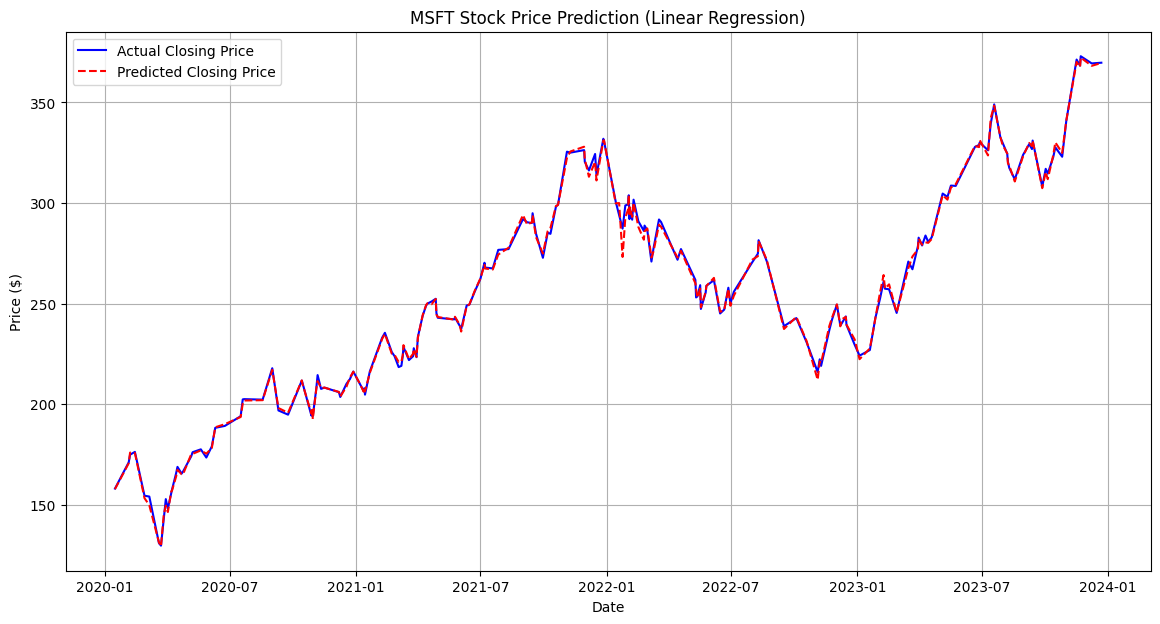


 Prediction Check (Last Day in Data):
Actual Closing Price: $371.21
Predicted Closing Price: $370.32


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np # Added for robust array handling

# --- Configuration ---
TICKER = 'MSFT'  # Ticker symbol for Microsoft
START_DATE = '2020-01-01'
END_DATE = '2024-01-01'
TEST_SIZE = 0.2  # 20% of data for testing

print(f" Starting Stock Price Prediction for {TICKER}...")

# --- 1. Data Acquisition (No Local File Needed) ---
try:
    # Download data directly from Yahoo Finance
    df = yf.download(TICKER, start=START_DATE, end=END_DATE)

    if df.empty:
        raise ValueError("Data download failed or returned empty DataFrame.")

    # Clean data: drop rows with any missing values
    df.dropna(inplace=True)

except Exception as e:
    print(f" ERROR: Could not download stock data. Details: {e}")
    exit()

print(f"Data successfully downloaded. Total rows: {len(df)}")


# --- 2. Feature and Target Preparation ---
# Features (X): Today's trading metrics (predictors)
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]

# Target (y): Today's Closing Price (what we predict)
# FIX: Use single brackets df['Close'] to ensure y is a 1D Pandas Series.
y = df['Close']

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=42
)

print(f"Data split: Train size = {len(X_train)}, Test size = {len(X_test)}")

# --- 4. Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")

# --- 5. Prediction and Evaluation ---
y_pred = model.predict(X_test)

# **FINAL FIX: Guarantee both arrays are 1D for DataFrame creation and evaluation**
# 1. Guarantee y_pred is 1D (use ravel for robustness)
y_pred_1d = np.ravel(y_pred)

# 2. Guarantee y_test is 1D (convert Series to numpy array and flatten)
y_test_1d = np.ravel(y_test.values)

mse = mean_squared_error(y_test_1d, y_pred_1d) # Use the 1D variables
r2 = r2_score(y_test_1d, y_pred_1d) # Use the 1D variables

print("\n Model Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 6. Visualize Results ---
# Use the corrected 1D variables for the DataFrame creation
results_df = pd.DataFrame(
    {'Actual Close': y_test_1d, 'Predicted Close': y_pred_1d},
    index=y_test.index # Keep the original index from y_test
)
results_df.sort_index(inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df['Actual Close'], label='Actual Closing Price', color='blue')
plt.plot(results_df.index, results_df['Predicted Close'], label='Predicted Closing Price', color='red', linestyle='--')
plt.title(f'{TICKER} Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# --- 7. Final Prediction Example ---
last_day_features = df[features].iloc[[-1]]

# FIX 1: The model prediction often returns an array, use [0] to select the first element.
# FIX 2: Then use .item() to ensure it is a simple float, resolving the TypeError.
predicted_last_close = model.predict(last_day_features)[0].item()

# This was previously corrected, but ensuring .item() is used again:
actual_last_close = df['Close'].iloc[-1].item()

print("\n Prediction Check (Last Day in Data):")
print(f"Actual Closing Price: ${actual_last_close:.2f}")
print(f"Predicted Closing Price: ${predicted_last_close:.2f}")